In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df['date_added'] = pd.to_datetime(df['date_added'])

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [5]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [6]:
df['year_added'] = df['date_added'].dt.year

In [7]:
df['month_added'] = df['date_added'].dt.month

In [8]:
df[['title', 'date_added', 'year_added', 'month_added']].head()

,title,date_added,year_added,month_added
0,Dick Johnson Is Dead,2021-09-25,2021.0,9.0
1,Blood & Water,2021-09-24,2021.0,9.0
2,Ganglands,2021-09-24,2021.0,9.0
3,Jailbirds New Orleans,2021-09-24,2021.0,9.0
4,Kota Factory,2021-09-24,2021.0,9.0


In [9]:
import matplotlib.pyplot as plt

In [10]:
movies = df[df['type'] == 'Movie']

In [11]:
movies = movies.dropna(subset=['year_added'])

In [12]:
year_counts = movies['year_added'].value_counts().sort_index()

In [13]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

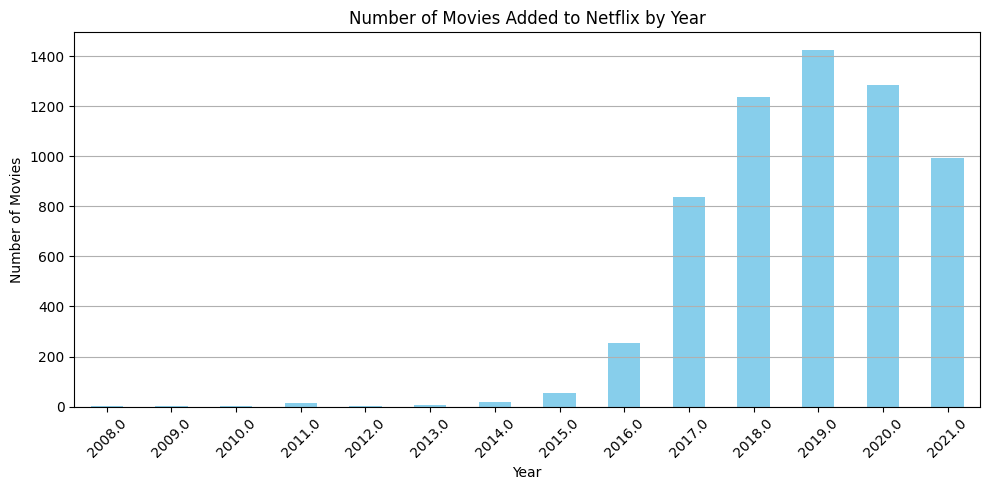

In [14]:
import matplotlib.pyplot as plt


movies = df[df['type'] == 'Movie']


movies = movies.dropna(subset=['year_added'])


year_counts = movies['year_added'].value_counts().sort_index()


plt.figure(figsize=(10, 5))
year_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Movies Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 📊 Insight:

The bar chart above shows the number of movies Netflix added each year.  
We can observe that:

- There was a noticeable growth in content additions starting around 2016.
- The peak appears between 2018–2020, likely due to Netflix’s global expansion.
- Post-2021 shows a slight decline, possibly influenced by the pandemic and shifting content strategies.
